# Regressão Logística (Logit)

A regressão logística é uma técnica estatística de modelagem preditiva amplamente utilizada para prever a probabilidade de uma variável dependente binária. Diferentemente da regressão linear que prediz um valor contínuo, a regressão logística é usada quando a variável de resposta é categórica. Ela é frequentemente empregada para problemas de classificação, onde o objetivo é determinar a qual de duas classes (tipicamente 0 ou 1) uma observação pertence, baseando-se em uma ou mais variáveis independentes.

## Modelo da Regressão Logística

O modelo é expresso pela função logit, que é o logaritmo da razão de chances (odds) de a variável dependente ser 1. A fórmula do modelo de regressão logística é:

$ \text{logit}(p) = \ln\left(\frac{p}{1-p}\right) = \alpha + \beta_0x_0 + \beta_1x_1 + \cdots + \beta_nx_n $

Onde:
- p é a probabilidade de a variável dependente ser igual a 1;
- $\alpha$ é o intercepto;
- $\beta_0, \beta_1, \ldots, \beta_n$ são os coeficientes das variáveis independentes $x_0, x_1, \ldots, x_n$.

Para a regressão logística, usamos a distribuição de Bernoulli para modelar a variável dependente, pois ela é adequada para dados binários, representando a probabilidade do evento de interesse (1) ocorrer com base na função logit das variáveis preditoras.


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# data (as pandas dataframes)
X = phiusiil_phishing_url_website.data.features
y = phiusiil_phishing_url_website.data.targets

# metadata
print(phiusiil_phishing_url_website.metadata)

# variable information
print(phiusiil_phishing_url_website.variables)


{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'last_updated': 'Mon Mar 18 

# O Dataset de Cybersegurança

Este dataset é voltado para o campo da cybersegurança, contendo informações relevantes para a tarefa de classificar websites entre legítimos e phishing. Phishing é uma técnica maliciosa usada por cibercriminosos para criar websites falsificados que se assemelham a sites legítimos, com o objetivo de enganar os usuários para que estes forneçam informações pessoais, como dados de login e números de cartão de crédito, ou para induzi-los a realizar ações que resultem em prejuízos financeiros.

O dataset inclui diversas features que ajudam na identificação de possíveis sites de phishing, tais como:
- **URL**: O endereço do site, que pode conter indícios de tentativas de imitar domínios conhecidos.
- **TLD (Top-Level Domain)**: O domínio de nível superior do site, que pode indicar em qual país o site está hospedado ou se utiliza um domínio geralmente associado a práticas legítimas.
- **Quantidade de Código em Javascript e CSS**: Sites de phishing frequentemente têm padrões distintos no uso de Javascript e CSS, que podem ser utilizados para enganar usuários ou ocultar conteúdo malicioso.
- **Informações Estatísticas**: Diversas métricas e estatísticas extraídas do conteúdo e estrutura do site, que podem diferenciar sites legítimos de fraudulentos.

Utilizaremos a regressão logística Bayesiana neste exemplo para modelar a probabilidade de um site ser considerado phishing com base nas features disponíveis. Este método permite incorporar conhecimento prévio e tratar incertezas de forma explícita, oferecendo uma ferramenta poderosa para a classificação em contextos onde a precisão e a interpretabilidade são cruciais.

As Features mais relevantes serão extraídas para a análise de acordo com a linha de código abaixo.

In [ ]:
X_f = X[["URL","URLSimilarityIndex","IsDomainIP","TLD","TLDLegitimateProb","IsResponsive","NoOfCSS","NoOfJS","HasExternalFormSubmit","Bank","Pay","Crypto","URLCharProb","NoOfiFrame"]]
X_f

,URL,URLSimilarityIndex,IsDomainIP,TLD,TLDLegitimateProb,IsResponsive,NoOfCSS,NoOfJS,HasExternalFormSubmit,Bank,Pay,Crypto,URLCharProb,NoOfiFrame
0,https://www.southbankmosaics.com,100.000000,0,com,0.522907,1,20,28,0,1,0,0,0.061933,1
1,https://www.uni-mainz.de,100.000000,0,de,0.032650,0,9,8,0,0,0,0,0.050207,0
2,https://www.voicefmradio.co.uk,100.000000,0,uk,0.028555,1,2,7,0,0,0,0,0.064129,0
3,https://www.sfnmjournal.com,100.000000,0,com,0.522907,1,27,15,0,0,1,1,0.057606,12
4,https://www.rewildingargentina.org,100.000000,0,org,0.079963,1,15,34,0,1,1,0,0.059441,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,100.000000,0,com,0.522907,1,7,21,0,0,1,0,0.058739,0
235791,https://www.winchester.gov.uk,100.000000,0,uk,0.028555,1,1,7,0,0,1,0,0.053834,0
235792,https://www.nononsensedesign.be,100.000000,0,be,0.003319,1,10,30,0,0,0,0,0.063093,0
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,28.157537,0,dev,0.000961,1,0,3,0,0,0,0,0.050211,2


In [ ]:
y_f = y.label.values #Retirar a coluna id
y_f

array([1, 1, 1, ..., 1, 0, 1])

Normalizando as features inteiras:

In [ ]:
X_f["NoOfCSS"] = (X["NoOfCSS"]-X["NoOfCSS"].mean())/X["NoOfCSS"].std()
X_f["NoOfJS"] = (X["NoOfJS"]-X["NoOfJS"].mean())/X["NoOfJS"].std()
X_f["NoOfiFrame"] = (X["NoOfiFrame"]-X["NoOfiFrame"].mean())/X["NoOfiFrame"].std()
X_f["URLSimilarityIndex"] = (X["URLSimilarityIndex"]-X["URLSimilarityIndex"].mean())/X["URLSimilarityIndex"].std()

X_f

<ipython-input-40-4ced73e9c673>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_f["NoOfCSS"] = (X["NoOfCSS"]-X["NoOfCSS"].mean())/X["NoOfCSS"].std()
<ipython-input-40-4ced73e9c673>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_f["NoOfJS"] = (X["NoOfJS"]-X["NoOfJS"].mean())/X["NoOfJS"].std()
<ipython-input-40-4ced73e9c673>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,URL,URLSimilarityIndex,IsDomainIP,TLD,TLDLegitimateProb,IsResponsive,NoOfCSS,NoOfJS,HasExternalFormSubmit,Bank,Pay,Crypto,URLCharProb,NoOfiFrame
0,https://www.southbankmosaics.com,0.744381,0,com,0.522907,1,0.182551,0.783325,0,1,0,0,0.061933,-0.102149
1,https://www.uni-mainz.de,0.744381,0,de,0.032650,0,0.035622,-0.113046,0,0,0,0,0.050207,-0.275683
2,https://www.voicefmradio.co.uk,0.744381,0,uk,0.028555,1,-0.057878,-0.157865,0,0,0,0,0.064129,-0.275683
3,https://www.sfnmjournal.com,0.744381,0,com,0.522907,1,0.276051,0.200684,0,0,1,1,0.057606,1.806725
4,https://www.rewildingargentina.org,0.744381,0,org,0.079963,1,0.115765,1.052236,0,1,1,0,0.059441,0.071385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,0.744381,0,com,0.522907,1,0.008908,0.469595,0,0,1,0,0.058739,-0.275683
235791,https://www.winchester.gov.uk,0.744381,0,uk,0.028555,1,-0.071235,-0.157865,0,0,1,0,0.053834,-0.275683
235792,https://www.nononsensedesign.be,0.744381,0,be,0.003319,1,0.048979,0.872962,0,0,0,0,0.063093,-0.275683
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,-1.734993,0,dev,0.000961,1,-0.084592,-0.337139,0,0,0,0,0.050211,0.071385


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_f, y_f, test_size=0.3)

X_train

,URL,URLSimilarityIndex,IsDomainIP,TLD,TLDLegitimateProb,IsResponsive,NoOfCSS,NoOfJS,HasExternalFormSubmit,Bank,Pay,Crypto,URLCharProb,NoOfiFrame
205120,https://ipfs.io/ipfs/bafybeidpwumidrneumebiw4v...,-2.364558,0,io,0.012927,0,-0.084592,-0.471594,0,0,0,0,0.037893,-0.275683
176520,http://www.mmds.oss-us-west-1.aliyuncs.com,-0.592436,0,com,0.522907,0,-0.084592,-0.471594,0,0,0,0,0.054916,-0.275683
135114,https://postescanada-ca-cp-en-home.web.app/,-1.238609,0,app,0.001502,1,-0.057878,-0.292320,0,0,0,0,0.061417,-0.275683
66459,http://www.thaddeusarmstrong.com,-0.598791,0,com,0.522907,0,-0.084592,-0.471594,0,0,0,0,0.059961,-0.275683
178443,https://www.livepenalty.com,0.744381,0,com,0.522907,1,-0.044521,-0.337139,0,0,1,0,0.057456,-0.275683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138990,https://acessoareadocliente.com/,-0.900721,0,com,0.522907,0,-0.084592,-0.471594,0,0,0,0,0.073288,-0.275683
179940,https://www.rjjonesauthor.com,0.744381,0,com,0.522907,1,-0.017807,0.021410,0,0,0,0,0.060703,-0.102149
79750,https://young-rain-4d88.nflch6e114.workers.dev/,-1.680403,0,dev,0.000961,0,-0.084592,-0.471594,0,0,0,0,0.041444,-0.275683
27687,http://www.4pu.com,0.216147,0,com,0.522907,0,-0.084592,-0.471594,0,0,0,0,0.046607,-0.275683


In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

# ADVI: Inferência Variacional Automática

Diante de um dataset de treinamento com aproximadamente 165.000 linhas e um de teste com 70.000, o uso de métodos de Monte Carlo via Cadeias de Markov (MCMC), como o NUTS, pode se mostrar desafiador em ambientes computacionais limitados, como o Google Colab, devido à alta demanda por tempo de processamento e memória RAM.

Para contornar essas limitações, optaremos pelo uso do ADVI (Automatic Differentiation Variational Inference), uma técnica de inferência variacional que se destaca por sua eficiência computacional. O ADVI aproveita a diferenciação automática para otimizar a aproximação da distribuição posterior, representando uma alternativa mais rápida em comparação aos métodos MCMC tradicionais, especialmente em datasets grandes.

## Como Utilizaremos o ADVI

Para implementar o ADVI, utilizaremos a função `pm.fit` disponível no PyMC. Este método é responsável por realizar a otimização variacional, gerando uma aproximação da distribuição a posteriori dos parâmetros do modelo. Após esta etapa, podemos gerar amostras dessa distribuição aproximada utilizando a função `sample_posterior_predictive`, permitindo a realização de predições e análises posteriores.

A grande vantagem de utilizar o ADVI em nosso exemplo reside na significativa redução do tempo de execução e no menor consumo de recursos computacionais, tornando viável a análise de datasets extensos em ambientes com restrições de hardware.




In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import numpy as np
import pytensor.tensor as tt
import pandas as pd

<ipython-input-46-390851948631>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_f.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)


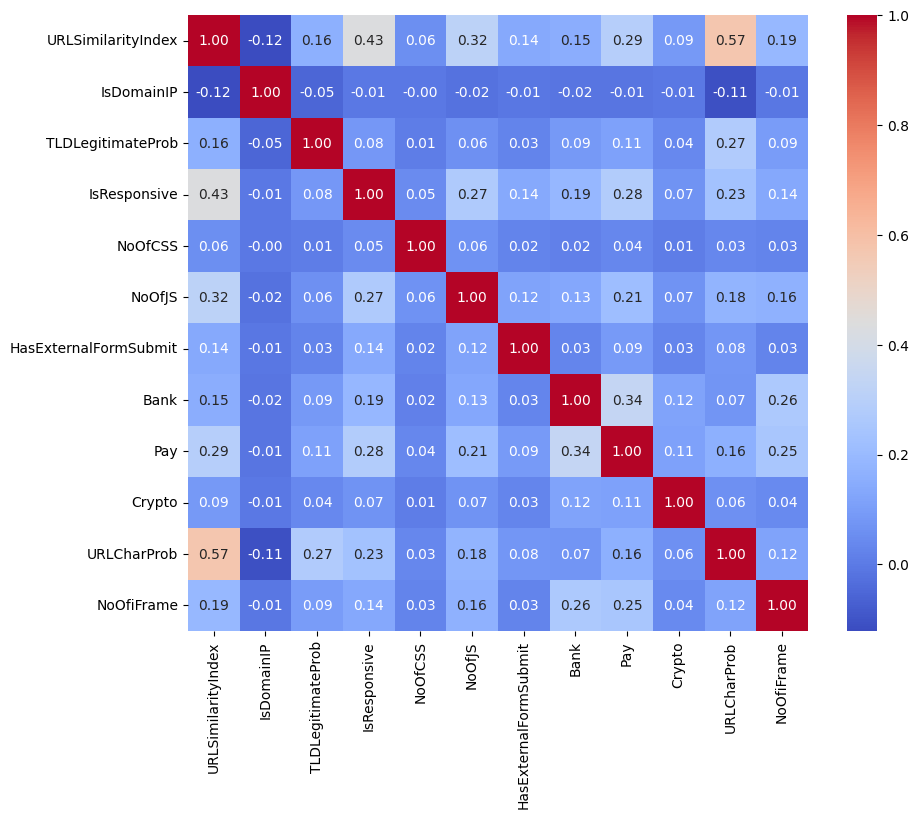

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(X_f.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()


In [109]:
#Para dimensionar o pymc.
coords = {
    'features': ['URLSimilarityIndex',
                 'IsDomainIP', 'TLDLegitimateProb', 'IsResponsive',
                 'NoOfCSS', 'NoOfJS', 'HasExternalFormSubmit',
                 'Bank', 'Pay', 'Crypto', 'URLCharProb', 'NoOfiFrame']
}

In [110]:
with pm.Model(coords=coords) as model_1:
  betas = pm.Normal("beta",0,1,dims="features")
  alpha = pm.Normal("alpha",0,1)

  X = [
    pm.MutableData("X_"+column,X_train[column].values)
    for column in X_train.columns if np.issubdtype(X_f[column].dtype, np.number)
  ]

  y = pm.MutableData("y",y_train)

  mu = alpha + tt.dot(betas,X)
  likelihood = pm.Bernoulli("likelihood",pm.math.invlogit(mu),observed=y)

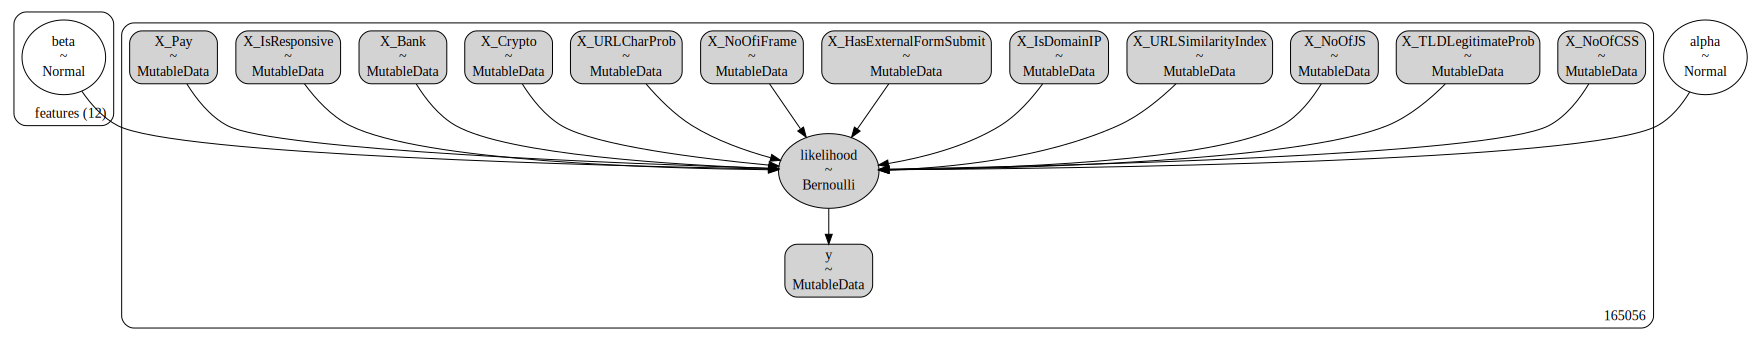

In [75]:
pm.model_to_graphviz(model_1)

In [76]:
with model_1:
  approx = pm.fit(20000)

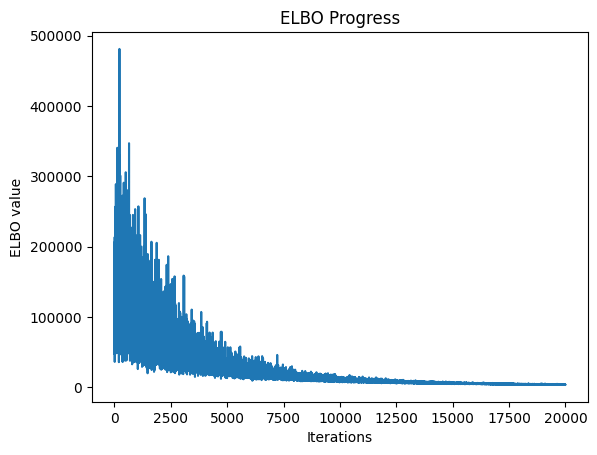

In [77]:
plt.plot(approx.hist)
plt.title('ELBO Progress')
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.show()

In [78]:
with model_1:
  trace = approx.sample(10000)

In [80]:
pm.summary(trace)

Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[URLSimilarityIndex],5.994,0.241,5.527,6.434,0.002,0.002,10162.0,9696.0,NaN
beta[IsDomainIP],-0.575,0.926,-2.250,1.222,0.009,0.007,9622.0,9184.0,NaN
beta[TLDLegitimateProb],-0.882,0.109,-1.088,-0.681,0.001,0.001,9839.0,9677.0,NaN
beta[IsResponsive],1.221,0.062,1.104,1.338,0.001,0.000,10120.0,9804.0,NaN
beta[NoOfCSS],5.427,0.474,4.519,6.310,0.005,0.003,9234.0,9229.0,NaN
beta[NoOfJS],4.897,0.153,4.629,5.201,0.002,0.001,9277.0,9603.0,NaN
beta[HasExternalFormSubmit],1.521,0.277,0.995,2.025,0.003,0.002,10256.0,9750.0,NaN
beta[Bank],-0.067,0.079,-0.209,0.085,0.001,0.001,9924.0,9763.0,NaN
beta[Pay],0.975,0.076,0.830,1.116,0.001,0.001,9913.0,9829.0,NaN
beta[Crypto],0.194,0.163,-0.118,0.492,0.002,0.001,9863.0,9877.0,NaN


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>]], dtype=object)

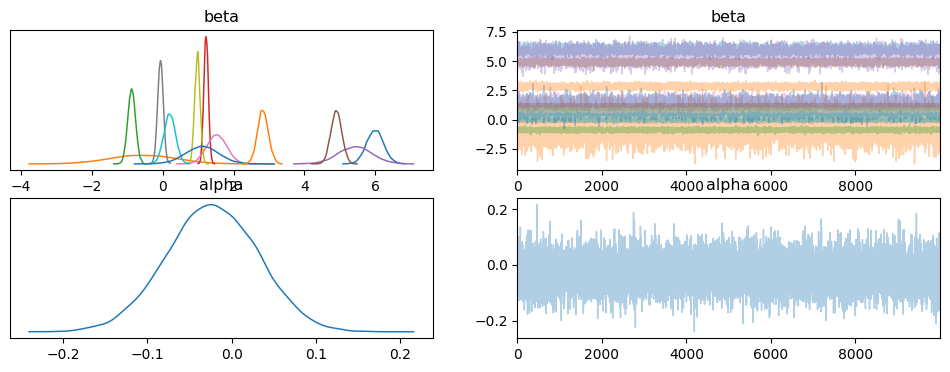

In [99]:
az.plot_trace(trace)

In [81]:
vars = {"X_"+column : X_test[column].values
    for column in X_test.columns if np.issubdtype(X_test[column].dtype, np.number)}
vars["y"] = y_test

In [82]:
with model_1:
  pm.set_data(vars)
  trace_post = pm.sample_posterior_predictive(trace)

In [83]:
trace_post

Inference data with groups:
	> posterior_predictive
	> observed_data
	> constant_data

In [85]:
mean_likelihood = trace_post.posterior_predictive['likelihood'].mean(dim=['chain', 'draw'])
binary_predictions = (mean_likelihood > 0.5).astype(int)

In [105]:
abs_diff = np.abs(y_test - binary_predictions)

df = pd.DataFrame({
    'URL': X_test["URL"],
    'y_test': y_test,
    'binary_predictions': binary_predictions,
    'abs_diff': abs_diff
})

df

,URL,y_test,binary_predictions,abs_diff
181349,https://www.broadlandmemories.co.uk,1,1,0
199965,https://optusnet-com.blogspot.jp/,0,0,0
54410,https://case771045-appeal-verification.firebas...,0,0,0
36332,https://www.scientificgames.com,1,1,0
44673,https://fglitc00002.web.app/,0,0,0
...,...,...,...,...
113465,http://www.windowsupdate.gettrials.com,0,0,0
210067,https://www.insaco.com,1,1,0
148920,https://www.tapestryhouse.com,1,1,0
228213,https://www.financialounge.com,1,1,0


In [103]:
errors = df["abs_diff"].sum()
acc = (len(df)-errors)/len(df)
print(f"Acuracia: {acc:.4f}")
print(f"Erros: {errors}")

Acuracia: 0.9953
Erros: 332


In [100]:
class1 = df["y_test"].sum()
class0 = len(df)-class1

print(f"Classe 0: {class0}")
print(f"Classe 1: {class1}")

Classe 0: 30276
Classe 1: 40463


A acurácia do modelo é de 99.53% e as classes possuem um desbalanceamento de 30.276 (classe 0) contra 40.463 (classe 1). Para entender melhor o desempenho do modelo nesse contexto de desbalanceamento, vamos investigar o recall, a precisão e o F1.

O recall, também conhecido como sensibilidade, mensura a capacidade do modelo de identificar corretamente todas as instâncias positivas da classe de interesse. Em outras palavras, ele indica qual proporção das instâncias realmente positivas foi identificada corretamente pelo modelo. Um recall de 1 (ou 100%) significa que o modelo identificou corretamente todas as instâncias positivas, sendo especialmente importante em cenários onde o custo de não detectar um positivo é alto, como em diagnósticos médicos.

Já a precisão mede a proporção das identificações positivas que foram de fato corretas. Diferentemente do recall, que se preocupa com todas as instâncias positivas reais, a precisão foca nas que o modelo afirmou ser positivas e quantas delas realmente eram. Uma precisão alta indica que, quando o modelo prediz uma instância como positiva, há uma grande chance de que esta previsão esteja correta. Isso é crucial em situações onde falsos positivos têm um grande custo associado, como em alarmes de segurança.

Por fim, o F1 mensura uma média harmônica entre precisão e recall, oferecendo um único indicador que leva em conta tanto a capacidade do modelo de identificar corretamente as instâncias positivas (recall) quanto a sua precisão em afirmar que uma instância é positiva. O F1 é particularmente útil quando você precisa de um equilíbrio entre precisão e recall, e é excelente para comparar modelos que operam em datasets desbalanceados ou quando as falsas positivas e negativas têm custos diferentes. Um F1 próximo de 1 indica um modelo muito bem ajustado, tanto em termos de precisão quanto de recall.

In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, binary_predictions)

recall = recall_score(y_test, binary_predictions)

f1 = f1_score(y_test, binary_predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9919
Recall: 1.0000
F1 Score: 0.9959


In [107]:
df[df["abs_diff"] == 1]

,URL,y_test,binary_predictions,abs_diff
62870,http://www.googletagmanager.com,0,1,1
30440,http://www.trafficultimatum.com,0,1,1
11658,http://www.shopeeox.com/,0,1,1
188521,https://urlz.fr/l55q,0,1,1
126144,http://www.uudama.com,0,1,1
...,...,...,...,...
91032,http://www.rofx.net,0,1,1
126847,http://www.sharestion.com,0,1,1
107679,http://www.tim.com,0,1,1
31644,http://www.hideoxy.com,0,1,1


# Exercícios

1) Implemente um modelo hierárquico baseando-se na feature TLD. Ou seja, o modelo será condicionado de acordo com o Top-Level Domain.

2) Implemente uma regressão logística Bayesiana para o dataset Iris: https://archive.ics.uci.edu/dataset/53/iris